# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [58]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from config import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [59]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)
cities

['punta umbria',
 'novikovo',
 'pisco',
 'norman wells',
 'arraial do cabo',
 'scottsburgh',
 'tasiilaq',
 'olafsvik',
 'kilindoni',
 'ust-nera',
 'bela',
 'hobart',
 'idanre',
 'caraballeda',
 'laguna',
 'biak',
 'east london',
 'necochea',
 'staryy nadym',
 'sao joao da barra',
 'kapaa',
 'sulangan',
 'bonavista',
 'katsuura',
 'ushuaia',
 'punta arenas',
 'alofi',
 'mandalgovi',
 'albany',
 'jamestown',
 'vaitupu',
 'dunedin',
 'cidreira',
 'lolua',
 'amderma',
 'nizhneyansk',
 'barentsburg',
 'faanui',
 'berlevag',
 'bubaque',
 'shelburne',
 'rikitea',
 'hasaki',
 'cape town',
 'victoria',
 'acajutla',
 'moiyabana',
 'bandarbeyla',
 'goma',
 'san felipe',
 'cabo san lucas',
 'atuona',
 'butaritari',
 'walvis bay',
 'sechura',
 'price',
 'coahuayana',
 'chuy',
 'ribeira grande',
 'salta',
 'forssa',
 'dali',
 'chaoyang',
 'avera',
 'srednekolymsk',
 'brahmapuri',
 'imeni poliny osipenko',
 'provideniya',
 'montepuez',
 'vysotsk',
 'wanlaweyn',
 'jaisinghnagar',
 'tuktoyaktuk',
 'vry

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [70]:
url = "http://api.openweathermap.org/data/2.5/weather?"

# Build partial query URL
units = "metric"
query_url = f"{url}appid={api_key}&units={units}&q="

# set up lists to hold reponse info
city_name = [] 
cloudiness = [] 
country = []    
date = []       
humidity = []   
lat = []        
lng = []        
max_temp = []   
wind_speed = []
cnt = 0
set_cnt = 1

print('Beginning Data Retrieval')     
print('-----------------------------')

for num in cities:
    #print(f"Processing record {cnt} of set {set_cnt} | : {num}")
    response = requests.get(query_url + num).json()
    
    try:
        city_name.append(response['name'])
        cloudiness.append(response['clouds']['all'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        humidity.append(response['main']['humidity'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        wind_speed.append(response['wind']['speed'])
                
        if (cnt == 50):
            set_cnt += 1
            cnt = 1
        else:
            cnt += 1
        print(f"Processing record {cnt} of set {set_cnt} | : {num}")        
          
    except (KeyError, IndexError):
        print("City not found. Skipping...")        
       

Beginning Data Retrieval
-----------------------------
Processing record 1 of set 1 | : punta umbria
Processing record 2 of set 1 | : novikovo
Processing record 3 of set 1 | : pisco
Processing record 4 of set 1 | : norman wells
Processing record 5 of set 1 | : arraial do cabo
City not found. Skipping...
Processing record 6 of set 1 | : tasiilaq
City not found. Skipping...
Processing record 7 of set 1 | : kilindoni
Processing record 8 of set 1 | : ust-nera
Processing record 9 of set 1 | : bela
Processing record 10 of set 1 | : hobart
Processing record 11 of set 1 | : idanre
Processing record 12 of set 1 | : caraballeda
Processing record 13 of set 1 | : laguna
Processing record 14 of set 1 | : biak
Processing record 15 of set 1 | : east london
Processing record 16 of set 1 | : necochea
Processing record 17 of set 1 | : staryy nadym
Processing record 18 of set 1 | : sao joao da barra
Processing record 19 of set 1 | : kapaa
Processing record 20 of set 1 | : sulangan
Processing record 21 of

Processing record 28 of set 4 | : alice springs
Processing record 29 of set 4 | : castro
Processing record 30 of set 4 | : mehamn
Processing record 31 of set 4 | : salvador
Processing record 32 of set 4 | : iqaluit
Processing record 33 of set 4 | : anadyr
Processing record 34 of set 4 | : xiongyue
Processing record 35 of set 4 | : meadow lake
Processing record 36 of set 4 | : samarinda
Processing record 37 of set 4 | : new norfolk
Processing record 38 of set 4 | : sitka
Processing record 39 of set 4 | : airai
Processing record 40 of set 4 | : vardo
City not found. Skipping...
Processing record 41 of set 4 | : yulara
Processing record 42 of set 4 | : kruisfontein
Processing record 43 of set 4 | : aktau
Processing record 44 of set 4 | : zhigansk
Processing record 45 of set 4 | : beringovskiy
Processing record 46 of set 4 | : chokurdakh
Processing record 47 of set 4 | : bredasdorp
Processing record 48 of set 4 | : lavrentiya
City not found. Skipping...
Processing record 49 of set 4 | : ga

Processing record 4 of set 8 | : solnechnyy
Processing record 5 of set 8 | : ayan
Processing record 6 of set 8 | : ternate
Processing record 7 of set 8 | : yelizovo
Processing record 8 of set 8 | : giresun
Processing record 9 of set 8 | : piet retief
Processing record 10 of set 8 | : yanaul
Processing record 11 of set 8 | : nantucket
City not found. Skipping...
Processing record 12 of set 8 | : namtsy
Processing record 13 of set 8 | : te anau
Processing record 14 of set 8 | : tanabe
City not found. Skipping...
Processing record 15 of set 8 | : touros
Processing record 16 of set 8 | : rocha
Processing record 17 of set 8 | : osypenko
Processing record 18 of set 8 | : chicama
Processing record 19 of set 8 | : aripuana
Processing record 20 of set 8 | : offa
Processing record 21 of set 8 | : flin flon
Processing record 22 of set 8 | : palana
Processing record 23 of set 8 | : tazovskiy
Processing record 24 of set 8 | : tautira
Processing record 25 of set 8 | : oussouye
Processing record 26 o

Processing record 30 of set 11 | : cotonou
Processing record 31 of set 11 | : mount pleasant
Processing record 32 of set 11 | : bijie
Processing record 33 of set 11 | : casablanca
Processing record 34 of set 11 | : banff
Processing record 35 of set 11 | : huarmey
Processing record 36 of set 11 | : khandbari
Processing record 37 of set 11 | : naestved
Processing record 38 of set 11 | : sankt georgen
Processing record 39 of set 11 | : ossora
Processing record 40 of set 11 | : lebanon
Processing record 41 of set 11 | : sonari
Processing record 42 of set 11 | : bilma
Processing record 43 of set 11 | : mezen
Processing record 44 of set 11 | : houma
Processing record 45 of set 11 | : diego de almagro
Processing record 46 of set 11 | : the pas
Processing record 47 of set 11 | : venado tuerto
Processing record 48 of set 11 | : namioka
Processing record 49 of set 11 | : zhangye
Processing record 50 of set 11 | : dubbo
Processing record 1 of set 12 | : senneterre
Processing record 2 of set 12 | 

In [71]:
city_pd = pd.DataFrame({"City": city_name,
                        "Cloudiness": cloudiness,
                        "Country": country,
                        "Date": date,
                        "Humidity": humidity,
                        "Lat": lat,
                        "Lng": lng,
                        "Max Temp": max_temp,
                        "Wind Speed": wind_speed
                       })

###Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [72]:
city_pd.to_csv("city_pd.csv")
city_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 553 entries, 0 to 552
Data columns (total 9 columns):
City          553 non-null object
Cloudiness    553 non-null int64
Country       553 non-null object
Date          553 non-null int64
Humidity      553 non-null int64
Lat           553 non-null float64
Lng           553 non-null float64
Max Temp      553 non-null float64
Wind Speed    553 non-null float64
dtypes: float64(4), int64(3), object(2)
memory usage: 39.0+ KB


In [65]:
city_pd.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Punta Umbria,0,ES,1552245493,71,37.18,-6.97,19.62,1.06
1,Novikovo,0,UA,1552245493,77,45.05,34.56,6.97,7.56
2,Pisco,20,PE,1552240800,30,-13.71,-76.20,22.00,4.60
3,Norman Wells,75,CA,1552240800,78,65.28,-126.83,-13.00,3.60
4,Arraial do Cabo,40,BR,1552240800,79,-22.97,-42.02,31.00,8.20


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

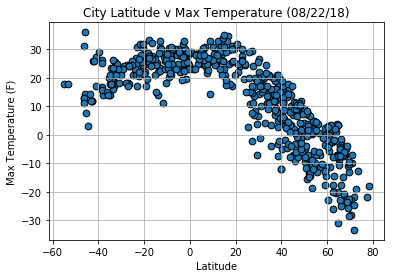

In [77]:
city_pd.plot.scatter(x="Lat", y="Max Temp", marker="o", s=45, facecolors="blue", 
                     edgecolors="black", grid=True)

# Create a title, x label, and y label for our chart
plt.title("City Latitude v Max Temperature (08/22/18)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.show()

#### Latitude vs. Humidity Plot

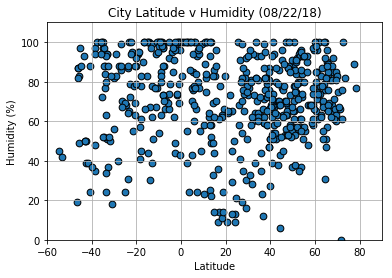

In [81]:
city_pd.plot.scatter(x="Lat", y="Humidity", marker="o", s=45, facecolors="blue", 
                     edgecolors="black",grid=True)

# Set the upper and lower limits of our y axis
plt.ylim(0,110)
# Set the upper and lower limits of our x axis
plt.xlim(-60,90)
# Create a title, x label, and y label for our chart
plt.title("City Latitude v Humidity (08/22/18)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.show()

#### Latitude vs. Cloudiness Plot

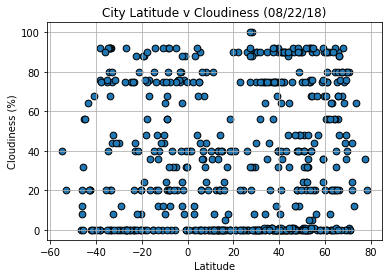

In [82]:
city_pd.plot.scatter(x="Lat", y="Cloudiness", marker="o", s=45, facecolors="blue", 
                     edgecolors="black",grid=True)

# Create a title, x label, and y label for our chart
plt.title("City Latitude v Cloudiness (08/22/18)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.show()

#### Latitude vs. Wind Speed Plot

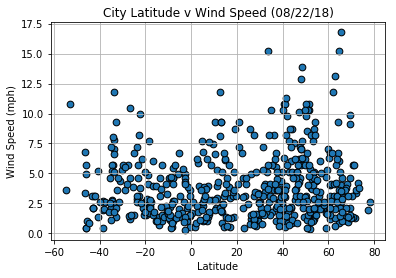

In [83]:
city_pd.plot.scatter(x="Lat", y="Wind Speed", marker="o", s=45, facecolors="blue", 
                     edgecolors="black",grid=True)

# Create a title, x label, and y label for our chart
plt.title("City Latitude v Wind Speed (08/22/18)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.show()